->  Total number of fundings in each year

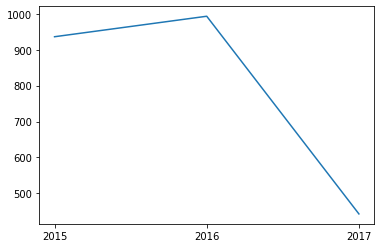

2015 936
2016 993
2017 443


In [50]:


import matplotlib.pyplot as plt
import numpy as np
import csv
with open("startup_funding.csv",encoding='utf8') as filename:
    filedata=csv.DictReader(filename,skipinitialspace=True)
    years=[]
    nof=[]
    for row in filedata:
        a=row['Date']
        l=len(a)-4
        years.append(a[l:])
    dict={}
    for i in years:
        if i in dict:
            dict[i]+=1
        else:
            dict[i]=1
    year=[]
    for i in dict:
        year.append(i)
        nof.append(dict[i])
    year=year[::-1]
    nof=nof[::-1]
    plt.plot(year,nof)
    plt.show()
    for i in range(3):
        print(year[i],nof[i])
    

->  Top Indian cities with most number of startups


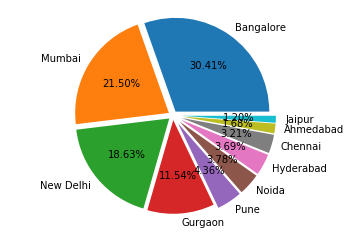

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv
with open("startup_funding.csv",encoding='utf8') as filename:
    filedata=csv.DictReader(filename,skipinitialspace=True)
    cityloc=[]
    for row in filedata:
        cityloc.append(row['CityLocation'])
    cityloc=np.array(cityloc)
    cityloc=cityloc[cityloc != '']
    
    for i in range(len(cityloc)):
        if cityloc[i]=='bangalore':
            cityloc[i]='Bangalore'
        if cityloc[i]=='Delhi':
            cityloc[i]='New Delhi'
    
    for i in range(len(cityloc)):
        cityloc[i]=cityloc[i].split('/')[0].strip()
    
    
    dict={}
    for i in cityloc:
        if i in dict:
            dict[i]+=1
        else:
            dict[i]=1
    city=[]
    nos=[]
    for i in dict:
        city.append(i)
        nos.append(dict[i])
    city=np.array(city)
    nos=np.array(nos)
    city=city[np.argsort(nos)[::-1]]
    nos=np.sort(nos)[::-1]
    explode=[0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.4,.4]
    plt.pie(nos[0:10],labels=city[0:10],radius=4,explode=explode,autopct='%.2f%%')
    plt.axis('equal')
    plt.show()
    for i in range(10):
        print(city[i],nos[i])
    

->  Top cities in india receiving most funding

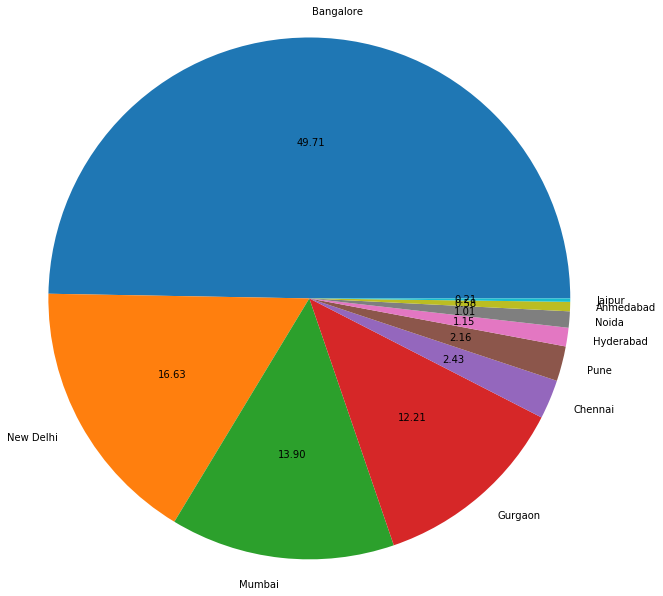

Bangalore 49.71
New Delhi 16.63
Mumbai 13.9
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
sf=pd.read_csv('startup_funding.csv')
df=sf.copy()
df.drop(df.index[df.CityLocation.isnull()],inplace=True)
df.reset_index(inplace=True,drop=True)    # Drop =True removes previous index column
df.loc[df.CityLocation=='bangalore', "CityLocation"]='Bangalore'
df.loc[df.CityLocation=='Delhi','CityLocation']='New Delhi'
df.loc[df.AmountInUSD.isnull(),'AmountInUSD']='0'
city=[]
amt=[]
for i in range(len(df.AmountInUSD)):
    city.append(df.CityLocation[i])
    amt.append(df.AmountInUSD[i])

for i in range(len(amt)):
    amt[i]=''.join(amt[i].split(','))
    city[i]=city[i].split('/')[0].strip()
city=np.array(city)
amt=np.array(amt,dtype='int64')


dict={}
for i in range((len(amt))):
    if city[i] in dict:
        dict[city[i]]+=amt[i]
    else:
        dict[city[i]]=amt[i]
        
cities=[]
amount=[]
for i in dict:
        cities.append(i)
        amount.append(dict[i])
cities=np.array(cities)
amount=np.array(amount)
cities=cities[np.argsort(amount)[::-1]]
cities=cities[:10]
amount=np.sort(amount)[::-1]
amount=amount[:10]
plt.pie(amount,labels=cities,radius=3,autopct='%.2f')
plt.show()
print('Bangalore',49.71)
print('New Delhi',16.63)
print('Mumbai',13.90)
print('Gurgaon',12.21)
print('Chennai',2.43)
print('Pune',2.16)
print('Hyderabad',1.15)
print('Noida',1.01)
print('Ahmedabad',0.58)
print('Jaipur',0.21)

->  Percentage ammount funding with each InvestmentType 

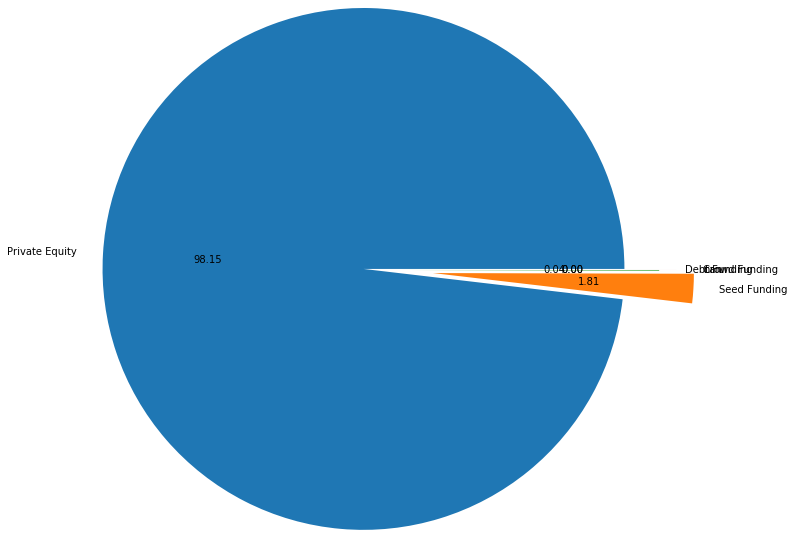

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [70]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
start=pd.read_csv("startup_funding.csv")
df=start.copy()
df.InvestmentType.unique()
df.loc[df.AmountInUSD.isnull(),'AmountInUSD']='0'
df.loc[df.InvestmentType=='SeedFunding','InvestmentType']='Seed Funding'
df.loc[df.InvestmentType=='PrivateEquity','InvestmentType']='Private Equity'
df.loc[df.InvestmentType=='Crowd funding','InvestmentType']='Crowd Funding'
amt=[]
fund=[]
dict={}
for i in df.InvestmentType:
    fund.append(i)
for i in df.AmountInUSD:
    amt.append(i)
amts=[]
for i in amt:
    amts.append(''.join(i.split(',')))
amts=np.array(amts,dtype='int64')
for i in range(len(fund)):
    if fund[i] in dict:
        dict[fund[i]]+=amts[i]
    else:
        dict[fund[i]]=amts[i]
funds=[]
nos=[]
for i in dict:
    funds.append(i)
    nos.append(dict[i])


funds=np.array(funds)
nos=np.array(nos)
funds=funds[np.argsort(nos)[::-1]]

nos=np.sort(nos)[::-1]


plt.pie(nos,labels=funds,autopct='%.2f',radius=3,explode=[0.2,0.6,0.2,0.4,0.4])
plt.show()

print('Private Equity',98.15)
print('Seed Funding',1.81)
print('Debt Funding',0.04)
print('Crowd Funding','0.00')
    

->  Industries vs Fundings in %

[4281189608 3797089000 1103593500  700000000  680000000]


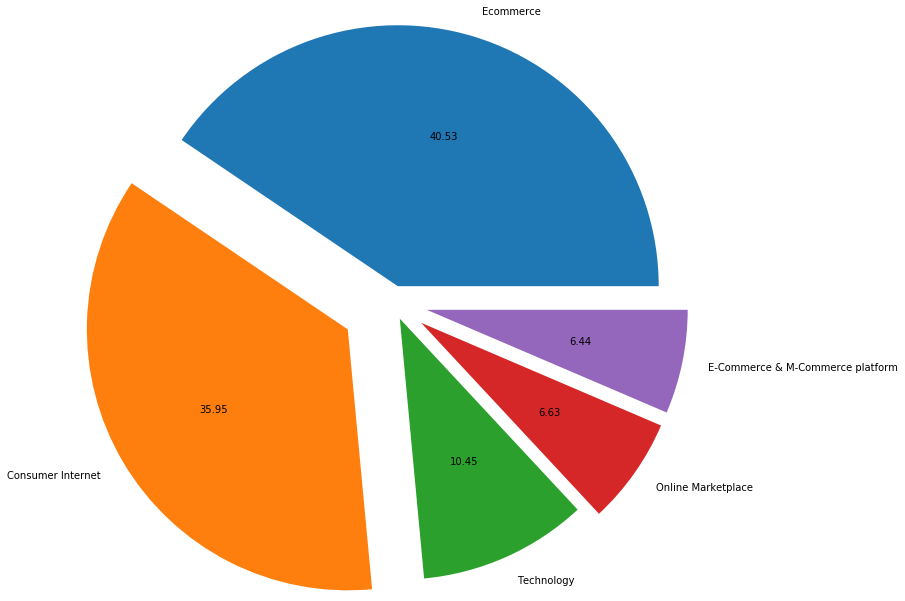

Ecommerce 40.52
Consumer Internet 35.96
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [4]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
start=pd.read_csv("startup_funding.csv")
df=start.copy()
a=df.IndustryVertical.unique()

df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)
df.reset_index(drop=True,inplace=True)

df.loc[df.AmountInUSD.isnull(),'AmountInUSD']='0'
df.loc[df.IndustryVertical=='eCommerce','IndustryVertical']='Ecommerce'
df.loc[df.IndustryVertical=='ecommerce','IndustryVertical']='Ecommerce'
df.loc[df.IndustryVertical=='ECommerce','IndustryVertical']='Ecommerce'
amt=[]

fund=[]
dict={}
for i in df.IndustryVertical:
    fund.append(i)
for i in df.AmountInUSD:
    amt.append(i)
amts=[]
for i in amt:
    amts.append(''.join(i.split(',')))
amts=np.array(amts,dtype='int64')
for i in range(len(fund)):
        if fund[i] in dict:
            dict[fund[i]]+=amts[i]
        else:
            dict[fund[i]]=amts[i]
funds=[]
nos=[]
for i in dict:
    funds.append(i)
    nos.append(dict[i])


funds=np.array(funds)
nos=np.array(nos)
funds=funds[np.argsort(nos)[::-1]]
funds=funds[:5]
nos=np.sort(nos)[::-1]
nos=nos[:5]


plt.pie(nos,labels=funds,autopct='%.2f',radius=3,explode=[0.2,0.6,0.2,0.4,0.4])
plt.show()

print('Ecommerce',40.52)
print('Consumer Internet',35.96)
print('Technology',10.45)
print('Online Marketplace',6.63)
print('E-Commerce & M-Commerce platform',6.44)
    

->  Startups with most number of fundings

['Paytm' 'Flipkart' 'Ola' 'Snapdeal' 'Oyo']
[2340000000 2259700000 1899500000  700000000  450000000]


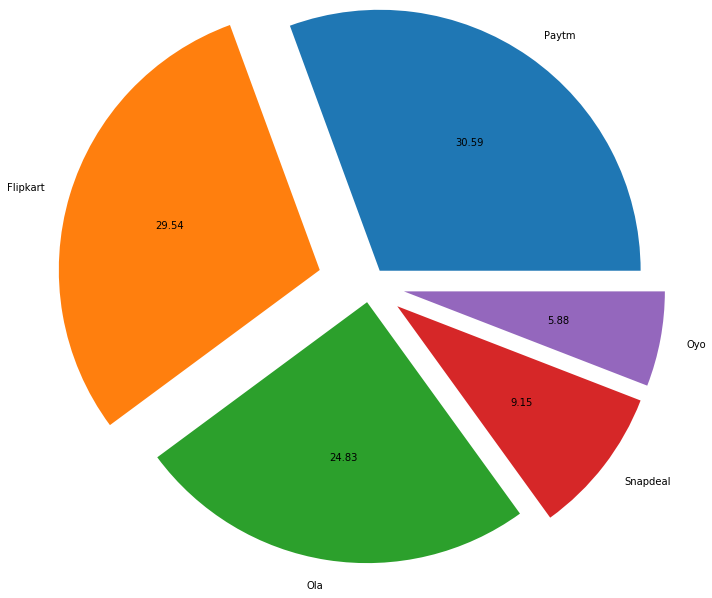

Paytm
Flipkart
Ola
Snapdeal
Oyo Rooms


In [69]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
start=pd.read_csv("startup_funding.csv")
df=start.copy()
a=df.StartupName.unique()


df.drop(df['SNo'].loc[df.StartupName.isnull()], inplace=True)
df.reset_index(drop=True,inplace=True)

df.loc[df.AmountInUSD.isnull(),'AmountInUSD']='0'
df.loc[df.StartupName=='Flipkart.com','StartupName']='Flipkart'
df.loc[df.StartupName=='Ola Cabs','StartupName']='Ola'
df.loc[df.StartupName=='ola','StartupName']='Ola'
df.loc[df.StartupName=='Olacabs','StartupName']='Ola'
df.loc[df.StartupName=='Paytm Marketplace','StartupName']='Paytm'
df.loc[df.StartupName=='Oyo Rooms','StartupName']='Oyo'
df.loc[df.StartupName=='OyO','StartupName']='Oyo'

amt=[]

sfund=[]
dict={}
for i in df.StartupName:
    sfund.append(i)
for i in df.AmountInUSD:
    amt.append(i)
amts=[]
for i in amt:
    amts.append(''.join(i.split(',')))
amts=np.array(amts,dtype='int64')
for i in range(len(sfund)):
        if sfund[i] in dict:
            dict[sfund[i]]+=amts[i]
        else:
            dict[sfund[i]]=amts[i]
funds=[]
nos=[]
for i in dict:
    funds.append(i)
    nos.append(dict[i])


funds=np.array(funds)
nos=np.array(nos)
funds=funds[np.argsort(nos)[::-1]]
funds=funds[:5]
nos=np.sort(nos)[::-1]
nos=nos[:5]
print(funds)
print(nos)



plt.pie(nos,labels=funds,autopct='%.2f',radius=3,explode=[0.2,0.6,0.2,0.4,0.4])
plt.show()
print('Paytm')
print('Flipkart')
print('Ola')
print('Snapdeal')
print('Oyo Rooms')


->  Investor invested most number of times

In [7]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
with open("startup_funding.csv",encoding='utf8') as filename:
    inv=[]
    start=csv.DictReader(filename,skipinitialspace=True)
    for i in start:
        if i['InvestorsName']!='Undisclosed investors':
                for j in i['InvestorsName'].split(','):
                    inv.append(j.strip())
    dict={}
    for i in inv:
        if i in dict:
            dict[i]+=1
        else:
            dict[i]=1
    names=[]
    times=[]
    for i in dict:
        names.append(i)
        times.append(dict[i])
    npnames=np.array(names)
    nptimes=np.array(times)
   
    maxi=npnames[nptimes.argmax()]
    print(maxi,nptimes.max())
   
        


Sequoia Capital 64


->  Top startups with most number of funding rounds

In [6]:

import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
data=pd.read_csv('startup_funding.csv')
df=data.copy()
np_startup=np.array(df.StartupName)

for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'

dic=dict()
for i in np_startup:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]


for i in range(len(np_x)):
    print(np_x[i], np_y[i])

TypeError: 'dict' object is not callable